In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
cd gdrive/Shared\ drives/group5/food11-image-dataset_new

/content/gdrive/Shared drives/group5/food11-image-dataset_new


In [0]:
import os
from PIL import Image
from PIL import ImageEnhance
import numpy as np
import pandas as pd
from sklearn import datasets, model_selection

import torch.nn as nn 
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision 
import torchvision.transforms as transforms

In [0]:
train_path = './training/'

0


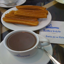

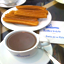

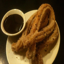

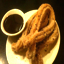

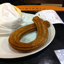

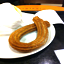

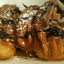

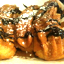

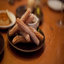

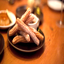

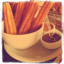

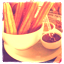

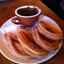

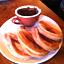

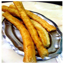

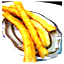

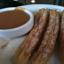

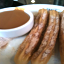

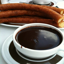

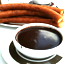

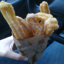

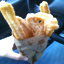

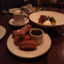

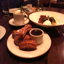

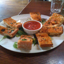

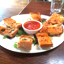

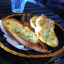

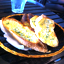

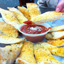

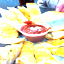

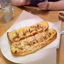

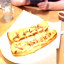

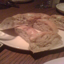

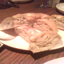

KeyboardInterrupt: ignored

In [0]:
import random

dirs = ['Bread', 'Dairy product', 'Dessert', 'Egg', 'Fried food', 'Meat', 'Noodles-Pasta', 'Rice', 'Seafood', 'Soup', 'Vegetable-Fruit']

data = []
label = []

for i, d in enumerate(dirs):
  files = os.listdir(train_path+d)
  print(i)
  
  for f in files:
    img = Image.open(train_path + d + '/' + f, 'r')
    # 이미지를 64, 64로 일괄 리사이즈 한다.
    resize_img = img.resize((64, 64))
    #display(resize_img)

    # 밝은 이미지
    brighter_img = ImageEnhance.Brightness(resize_img).enhance(1.5)
    #display(brighter_img)
    
    # 이미지를 RGB 컬러로 각각 쪼갠다.
    r, g, b = brighter_img.split()
    # 각 쪼갠 이미지를 255로 나눠서 0~1 사이의 값이 나오도록 정규화 한다.
    r_resize_img = np.asarray(np.float32(r) / 255.0)
    b_resize_img = np.asarray(np.float32(g) / 255.0)
    g_resize_img = np.asarray(np.float32(b) / 255.0)
    
    rgb_resize_img = np.asarray([r_resize_img, b_resize_img, g_resize_img])
    # 이렇게 가공한 이미지를 추가한다. 
    data.append(rgb_resize_img)
    # 라벨 (0~10)
    label.append(i)

In [0]:
import torch

data = np.array(data, dtype='float32')
label = np.array(label, dtype='int64')

In [0]:
print(data.shape)
print(label.shape)

(5500, 3, 64, 64)
(5500,)


In [0]:
enhance_train_X = torch.from_numpy(data).float()
enhance_train_Y = torch.from_numpy(label).long()

In [6]:
cd ..

/content/gdrive/Shared drives/group5


In [0]:
# np 저장

np.savez('./numpy/new_enhance_train_X', enhance_train_X)
np.savez('./numpy/new_enhance_train_Y', enhance_train_Y)

In [0]:
############################################# END ########################################################

In [0]:
# new_train_X, Y 불러오기

with np.load('./numpy/new_train_X.npz') as data:
    new_train_X = data['arr_0']

with np.load('./numpy/new_train_Y.npz') as data:
    new_train_Y = data['arr_0']

In [0]:
# new_rotate_train_X, Y 불러오기

with np.load('./numpy/new_rotate_train_X.npz') as data:
    new_rotate_train_X = data['arr_0']

with np.load('./numpy/new_rotate_train_Y.npz') as data:
    new_rotate_train_Y = data['arr_0']

In [0]:
# new_train_X, Y 불러오기

with np.load('./numpy/new_enhance_train_X.npz') as data:
    new_enhance_train_X = data['arr_0']

with np.load('./numpy/new_enhance_train_Y.npz') as data:
    new_enhance_train_Y = data['arr_0']

In [0]:
new_train_X = torch.from_numpy(new_train_X).float()
new_rotate_train_X = torch.from_numpy(new_rotate_train_X).float()
new_enhance_train_X = torch.from_numpy(new_enhance_train_X).float()

new_train_Y = torch.from_numpy(new_train_Y).long()
new_rotate_train_Y = torch.from_numpy(new_rotate_train_Y).long()
new_enhance_train_Y = torch.from_numpy(new_enhance_train_Y).long()

In [0]:
# normal, rotate, enhance 합치기

A = torch.cat([new_train_X, new_rotate_train_X])
B = torch.cat([new_train_Y, new_rotate_train_Y])

A = torch.cat([A, new_enhance_train_X])
B = torch.cat([B, new_enhance_train_Y])

In [0]:
print(A.shape)
print(B.shape)

torch.Size([16500, 3, 64, 64])
torch.Size([16500])


In [0]:
# 합친 np 저장

np.savez('./numpy/new_total_train_X', A)
np.savez('./numpy/new_total_train_Y', B)